# AI - MLP Project

## Function output prediction

### Ahmad Salimi - 97106013

In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler

In [606]:
class LossHistory(keras.callbacks.Callback):

    def __init__(self, learner):
        self.learner = learner

    def on_train_begin(self, logs={}):
        self.data = {'loss': [], 'lr': []}
    
    def on_epoch_end(self, batch, logs={}):
       self.data['loss'].append(logs.get('loss'))
       self.data['lr'].append(self.learner.lr)

In [607]:
class FunctionLearner:
    
    def __init__(self, function, data_size, train_domain):
        self.function = function
        self.X, self.y = self.make_random_dataset(data_size, train_domain)
        self.model = self.create_model()
        self.lr = 0.01
        self.alpha = 0.9
    
    def make_random_dataset(self, size:int, domain):
        X = np.arange(domain[0], domain[1], (domain[1] - domain[0]) / size)
        # X = np.random.uniform(domain[0], domain[1], size)
        y = self.function(X).reshape(size,)
        return X, y

    def step_decay(self, epoch):
        if epoch % 500 == 0:
            self.lr *= 0.9
        return self.lr
    
    def create_model(self):
        model = Sequential()
        model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(1))

        opt = keras.optimizers.adam(learning_rate=0.01)
        model.compile(optimizer=opt, loss='mse')
        return model
    
    def plot_result(self, x, xlim=None, ylim=None):
        x.sort()
        plt.figure(figsize=(15, 10))
        plt.plot(x, self.function(x), color='skyblue', label='original', linewidth=12, zorder=1)
        plt.scatter(self.X, self.y, color='green', label='train data', s=50, zorder=2)
        plt.plot(x, self.model.predict(x), color='red', label='predicted', linewidth=3, zorder=3)
        plt.grid()
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)
        plt.legend()

    def plot_history(self, name, ylim=None):
        plt.figure(figsize=(15, 10))
        plt.plot(np.arange(len(self.loss_history.data[name])), self.loss_history.data[name], color='skyblue', label='name', linewidth=3, zorder=1)
        plt.grid()
        if ylim:
            plt.ylim(ylim)
        plt.legend()
    
    def learn(self, epochs):
        learning_rate = LearningRateScheduler(self.step_decay)
        self.loss_history = LossHistory(self)

        self.model.fit(self.X, self.y, batch_size=10, epochs=epochs, callbacks=[self.loss_history, learning_rate], verbose=0, validation_split=0.1)

In [618]:
learner = FunctionLearner(lambda x: np.sin(x), 100, (-10, 10))

In [620]:
learner.learn(2000)

In [622]:
learner.loss_history.data['loss'][-1]

0.004540928833497067

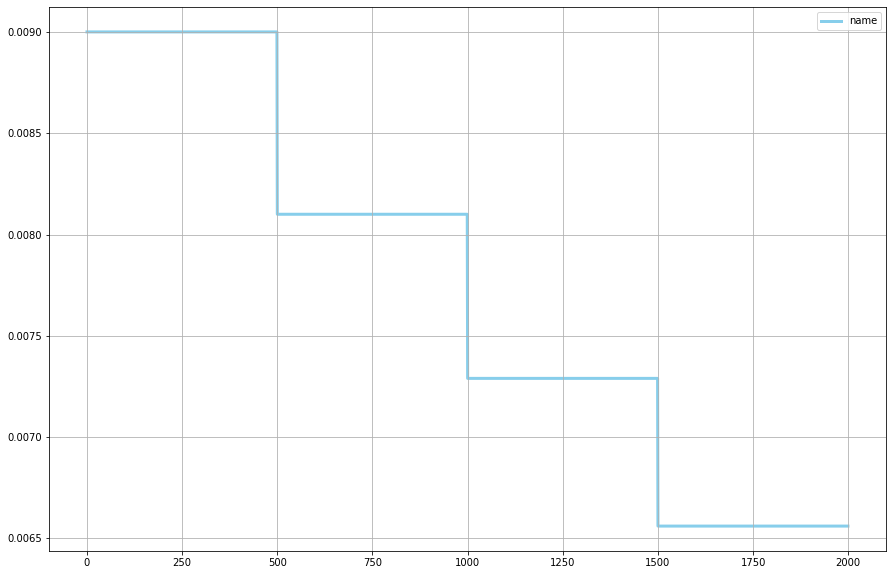

In [624]:
learner.plot_history('lr')

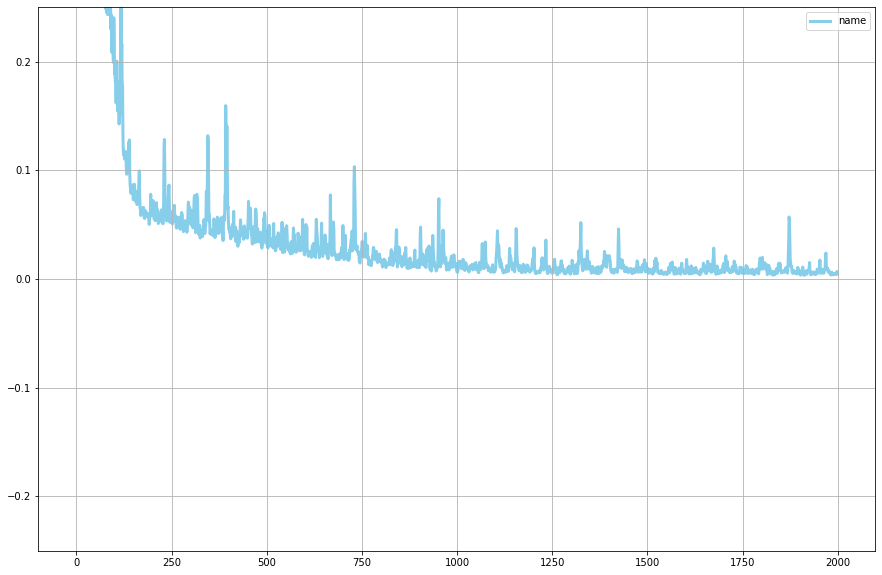

In [627]:
learner.plot_history('loss', ylim=(-.25, .25))

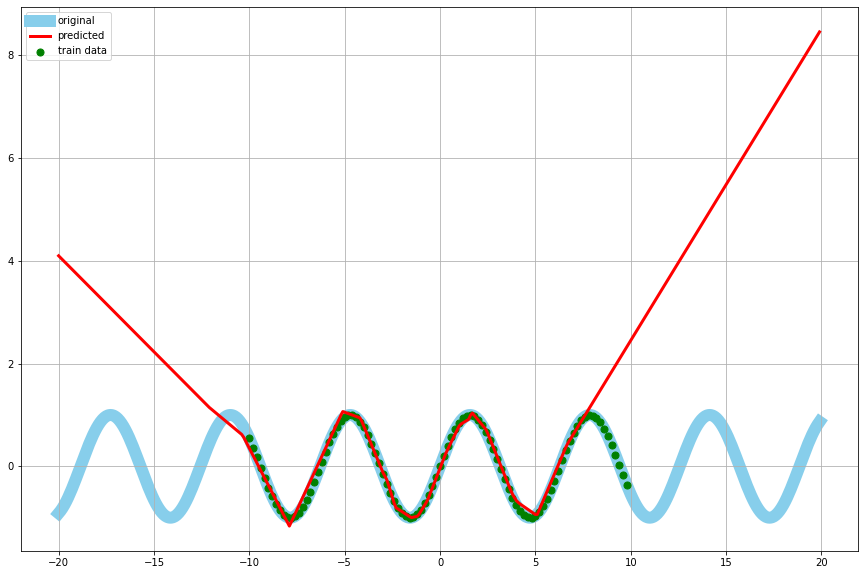

In [628]:
learner.plot_result(np.arange(-20, 20, 0.1))

In [629]:
learner = FunctionLearner(lambda x: 5 * x ** 3, 100, (-10, 10))

In [630]:
learner.learn(2000)

In [631]:
learner.loss_history.data['loss'][-1]

191.8803007337782

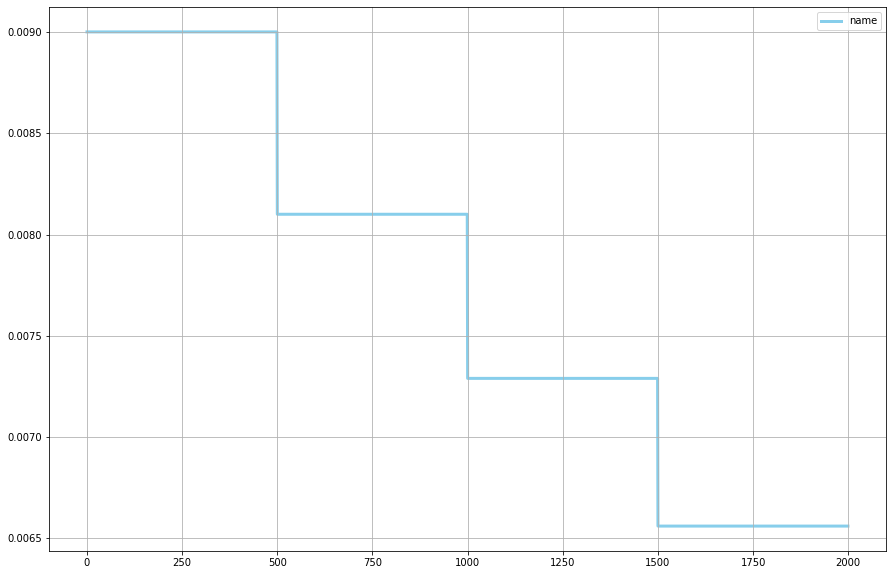

In [632]:
learner.plot_history('lr')

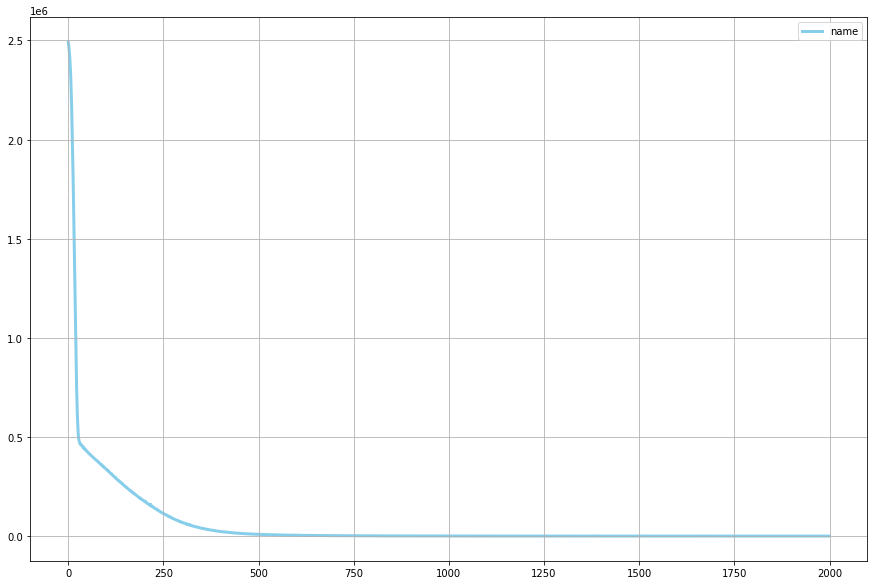

In [633]:
learner.plot_history('loss')

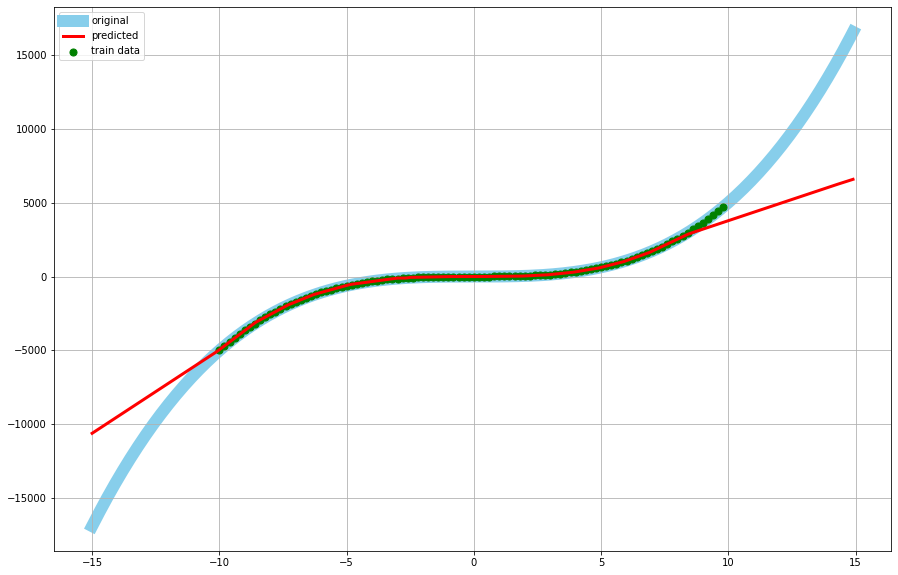

In [634]:
learner.plot_result(np.arange(-15, 15, .1))